광운대학교 건물 분류 (80주년기념관, 화도관)

In [1]:
import keras
import os, shutil
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# 데이터셋 저장한 디렉토리
base_dir = './Documents/datasets/KW_building'

# 훈련, 검증, 테스트 디렉토리
train_dir = './Documents/datasets/KW_building/train_dir'
validation_dir = './Documents/datasets/KW_building/validation_dir'
test_dir = './Documents/datasets/KW_building/test_dir'

# 훈련용 80주념기념관 사진 디렉터리
train_ginyeom_dir = './Documents/datasets/KW_building/train_dir/train_ginyeom_dir'

# 훈련용 화도관 사진 디렉터리
train_hwado_dir = './Documents/datasets/KW_building/train_dir/train_hwado_dir'

# 검증용 80주년기념관 사진 디렉터리
validation_ginyeom_dir = './Documents/datasets/KW_building/validation_dir/validation_ginyeom_dir'

# 검증용 화도관 사진 디렉터리
validation_hwado_dir = './Documents/datasets/KW_building/validation_dir/validation_hwado_dir'

# 테스트용 80주년기념관 사진 디렉터리
test_ginyeom_dir = './Documents/datasets/KW_building/test_dir/test_ginyeom_dir'

# 테스트용 화도관 사진 디렉터리
test_hwado_dir = './Documents/datasets/KW_building/test_dir/test_hwado_dir'

In [3]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

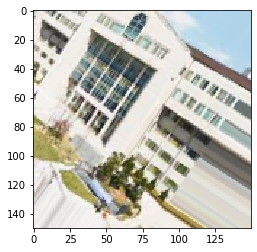

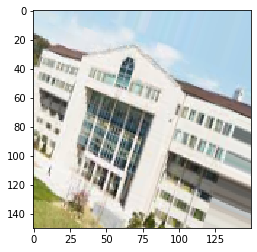

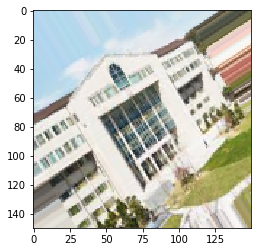

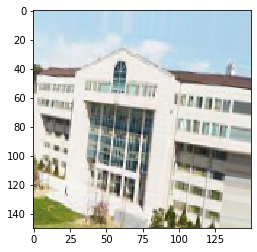

In [4]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_hwado_dir, fname) for fname in os.listdir(train_hwado_dir)])

# 증식할 이미지 선택
img_path = fnames[0]

# 이미지 읽고 크기 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

# flow() 메서드로 랜덤하게 변환된 이미지의 배치 생성
# 무한 반복되기 때문에 어느 지점에서 중지해야함
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [5]:
#모델생성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
model.summary()

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식안함
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉토리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿈
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야함
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 24s 236ms/step - loss: 0.4594 - acc: 0.7833 - val_loss: 0.5550 - val_acc: 0.6667
Epoch 2/5
100/100 [==============================] - 25s 254ms/step - loss: 0.1604 - acc: 0.9433 - val_loss: 0.4718 - val_acc: 0.6667
Epoch 3/5
100/100 [==============================] - 25s 254ms/step - loss: 0.0698 - acc: 0.9817 - val_loss: 2.3223 - val_acc: 0.6667
Epoch 4/5
100/100 [==============================] - 25s 253ms/step - loss: 0.0937 - acc: 0.9767 - val_loss: 0.5793 - val_acc: 0.6667
Epoch 5/5
100/100 [==============================] - 26s 263ms/step - loss: 0.0510 - acc: 0.9883 - val_loss: 0.5520 - val_acc: 0.8333


In [7]:
model.save('Modify_KW_Building')

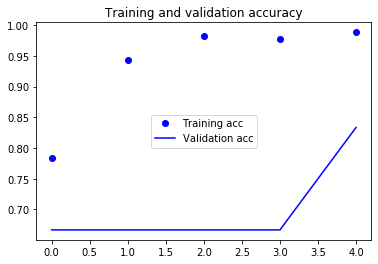

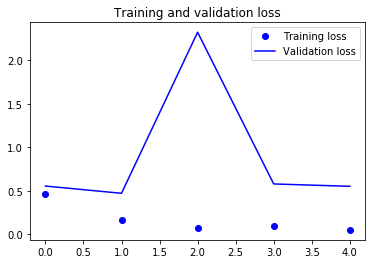

In [8]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 4 images belonging to 2 classes.
test acc: 0.75


In [10]:
import numpy as np
prediction = model.predict(test_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0
for i in prediction:
    if i >= 0.5: print("  이미지는 화도관으로 추정됩니다.")
    else : print(" 이미지는 80주년기념관으로 추정됩니다.")
    cnt += 1

 이미지는 80주년기념관으로 추정됩니다.
 이미지는 80주년기념관으로 추정됩니다.
 이미지는 80주년기념관으로 추정됩니다.
  이미지는 화도관으로 추정됩니다.
